# Tidy Tuesday with Pandas

## BBC Best Rap Artists

This week's Tidy Tuesday's data is from [Simon Jockers at DataWrapper](https://github.com/sjockers/bbc-best-rapmusic).

Here's some context about the data:

    Earlier this year, BBC Music asked more than 100 critics, artists, and other music industry folks from 15 countries for their five favorite hip-hop tracks. Then they broke down the results of the poll into one definitive list. But BBC Music didn’t just publish a best-of list, they also published the complete poll results and a description of the simple algorithm they ranked the songs with. - Simon Jockers

    We awarded 10 points for first ranked track, eight points for second ranked track, and so on down to two points for fifth place. The song with the most points won. We split ties by the total number of votes: songs with more votes ranked higher. Any ties remaining after this were split by first place votes, followed by second place votes and so on: songs with more critics placing them at higher up the lists up ranked higher. -- BBC Music

Two datasets were provided, the raw poll results as well as a dataset cleaned in R using the algorithm described the second paragraph above. For more info about the data (data schema/dictionnary, etc.) please see the TidyTuesday Github page [here](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-04-14/readme.md).

In this notebook, I'll be (1) replicating the algorithm/cleaning R script but using Pandas, then (2) doing some fun vizualizations using Seaborn and Altair.

In [1]:
# import standard libraries
import numpy as np
import pandas as pd
# some libaries for plotting. Not sure which I will use just yet
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# let's read in the data!
polls = pd.read_csv('https://raw.githubusercontent.com/sjockers/bbc-best-rapmusic/master/data/polls.csv')
rankings = pd.read_csv('https://raw.githubusercontent.com/sjockers/bbc-best-rapmusic/master/data/ranking.csv')

In [3]:
### some quick investigation on the data
polls.head(10)

,rank,title,artist,gender,year,critic_name,critic_rols,critic_country,critic_country2
0,1,Terminator X To The Edge of Panic,Public Enemy,male,1998,Joseph Abajian,Fat Beats,US,
1,2,4th Chamber,Gza ft. Ghostface Killah & Killah Priest & RZA,male,1995,Joseph Abajian,Fat Beats,US,
2,3,Peter Piper,Run DMC,male,1986,Joseph Abajian,Fat Beats,US,
3,4,Play That Beat Mr DJ,GLOBE & Whiz Kid,male,2001,Joseph Abajian,Fat Beats,US,
4,5,Time’s Up,O.C.,male,1994,Joseph Abajian,Fat Beats,US,
5,1,Players,Slum Village,male,1997,Biba Adams,Critic,US,
6,2,Self Destruction,Stop The Violence Movement,mixed,1989,Biba Adams,Critic,US,
7,3,Push It,Salt-N-Pepa,female,1986,Biba Adams,Critic,US,
8,4,Ambitionz Az A Ridah,2Pac,male,1996,Biba Adams,Critic,US,
9,5,Big Pimpin',JAY-Z ft. UGK,male,1999,Biba Adams,Critic,US,


In [4]:
rankings.head(10)

,ID,title,artist,year,gender,points,n,n1,n2,n3,n4,n5
0,1,Juicy,The Notorious B.I.G.,1994,male,140,18,9,3,3,1,2
1,2,Fight The Power,Public Enemy,1989,male,100,11,7,3,1,0,0
2,3,Shook Ones (Part II),Mobb Deep,1995,male,94,13,4,5,1,1,2
3,4,The Message,Grandmaster Flash & The Furious Five,1982,male,90,14,5,3,1,0,5
4,5,Nuthin’ But A ‘G’ Thang,Dr Dre ft. Snoop Doggy Dogg,1992,male,84,14,2,4,2,4,2
5,6,C.R.E.A.M.,Wu-Tang Clan,1993,male,62,10,3,1,1,4,1
6,7,93 ’Til Infinity,Souls of Mischief,1993,male,50,7,2,2,2,0,1
7,8,Passin’ Me By,The Pharcyde,1992,male,48,6,3,2,0,0,1
8,9,N.Y. State Of Mind,Nas,1994,male,46,7,1,3,1,1,1
9,10,Dear Mama,2Pac,1995,male,42,6,2,1,1,2,0


# Cleaning Script
The rankings dataframe was generated using an R script by Simon Jockers. <u>Let's see if I can do the same thing using pandas.</u>

In [5]:
### Let's take a look at the column names
polls.columns.unique()

Index(['rank', ' title', ' artist', ' gender', ' year', ' critic_name',
       ' critic_rols', ' critic_country', ' critic_country2'],
      dtype='object')

In [6]:
## remove the spaces in the column headers
polls.columns = polls.columns.str.replace(' ','')

In [7]:
## PANDAS TO THE RESCUE
rankings1 = polls.groupby(['title','artist','gender','year'])['rank']\
                 .agg(n='count', 
                      rank1= lambda x: sum(x==1), 
                      rank2= lambda x: sum(x==2),
                      rank3= lambda x: sum(x==3),
                      rank4= lambda x: sum(x==4),
                      rank5= lambda x: sum(x==5),
                      )\
                 .assign(points = lambda x: x['rank1']*10\
                                          + x['rank2']*8\
                                          + x['rank3']*6\
                                          + x['rank4']*4\
                                          + x['rank5']*2)\
                 .sort_values(by=['points','n'],ascending=False)\
                 .reset_index()

In [8]:
rankings1.head()

,title,artist,gender,year,n,rank1,rank2,rank3,rank4,rank5,points
0,Juicy,The Notorious B.I.G.,male,1994,18,9,3,3,1,2,140
1,Fight The Power,Public Enemy,male,1989,11,7,3,1,0,0,100
2,Shook Ones (Part II),Mobb Deep,male,1995,13,4,5,1,1,2,94
3,The Message,Grandmaster Flash & The Furious Five,male,1982,14,5,3,1,0,5,90
4,Nuthin’ But A ‘G’ Thang,Dr Dre ft. Snoop Doggy Dogg,male,1992,14,2,4,2,4,2,84


# Visualizations

Some visualizations I want to do:<br>
1. Where are the critics from?
2. Distribution of point scores?
3. Comparing Year/Gender/Rank

## Seaborn

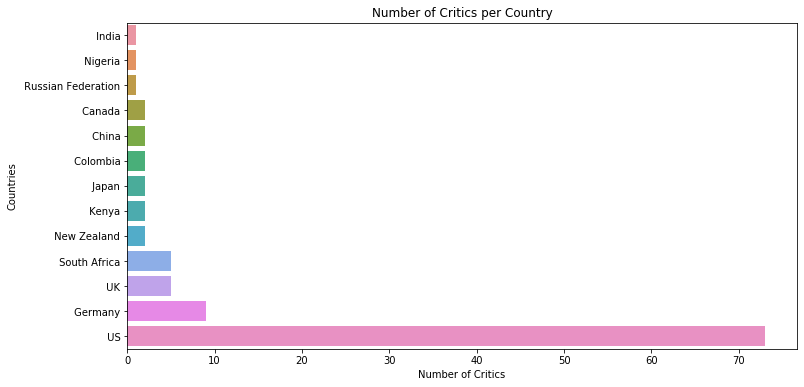

In [62]:
### Distribution of Critics

plt.figure(figsize=(12,6))
plt.title("Number of Critics per Country")
chart = sns.barplot(x=polls.groupby(['critic_country'])['rank'].count().sort_values()/5, 
            y=polls.groupby(['critic_country'])['rank'].count().sort_values().index)
plt.ylabel("Countries")
plt.xlabel("Number of Critics")
plt.show(chart);

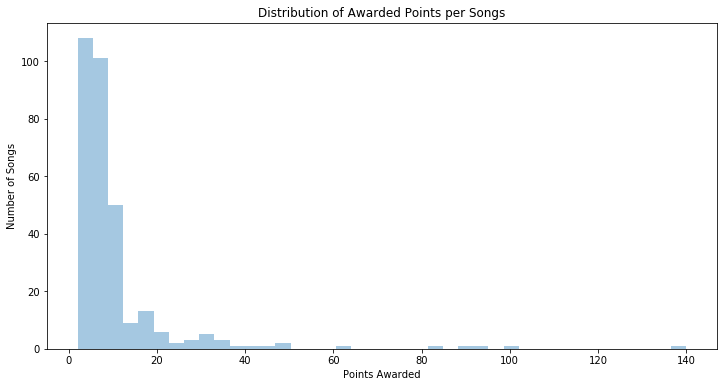

In [56]:
plt.figure(figsize=(12,6))
sns.distplot(rankings1['points'], kde = False, bins = 40)\
            .set_title("Distribution of Awarded Points per Songs")
plt.ylabel("Number of Songs")
plt.xlabel("Points Awarded");

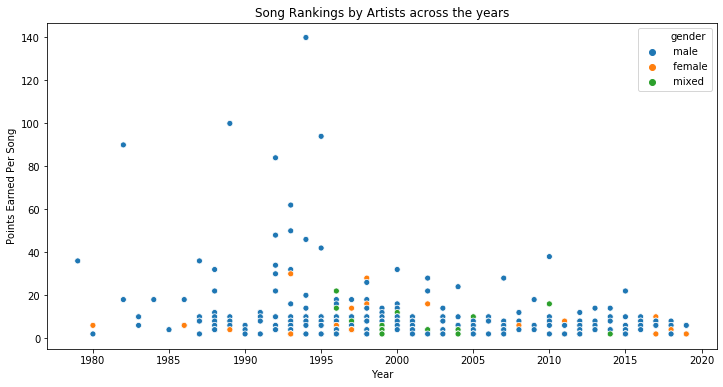

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=rankings1, x="year", y="points",hue="gender")\
    .set_title("Song Rankings by Artists across the years")
plt.ylabel("Points Earned Per Song")
plt.xlabel("Year");